In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('Thyroid Disease.csv')

In [2]:
from sklearn.impute import SimpleImputer

# Handling missing values
imputer = SimpleImputer(strategy='mean')

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()

In [4]:
import numpy as np

# Handle non-numeric data
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df_cleaned = imputer.fit_transform(df)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection
X = df_cleaned[:, :-2]  # Features, excluding Stage and Response
y = df_cleaned[:, -1]   # Response variable

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

C:\Users\Global\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Global\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


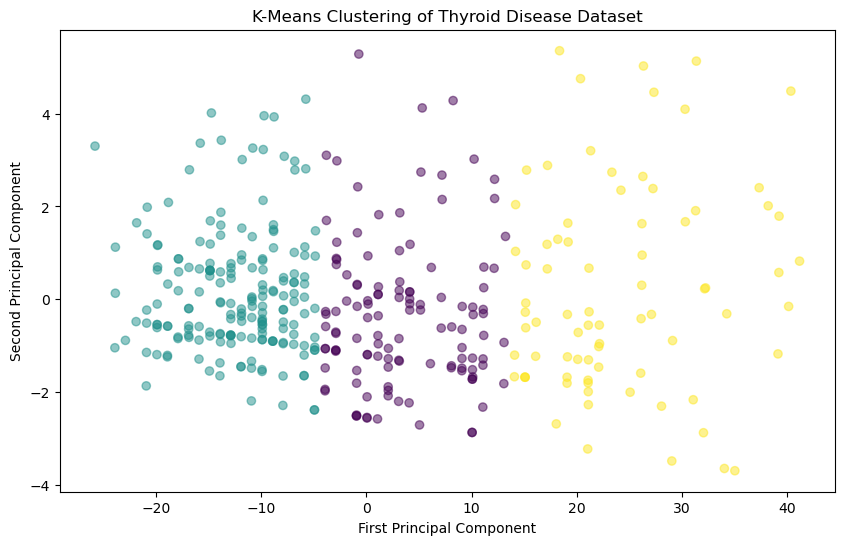

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], alpha=0.5)
plt.title('K-Means Clustering of Thyroid Disease Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

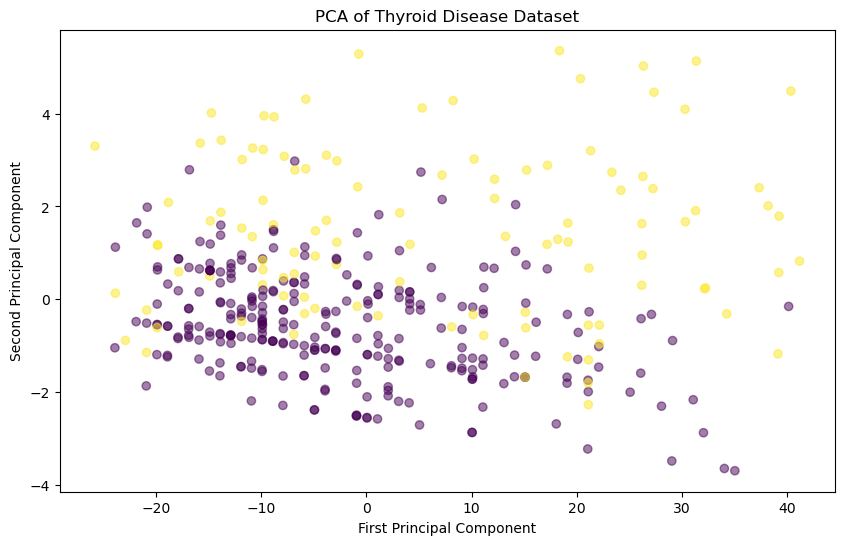

In [8]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5)
plt.title('PCA of Thyroid Disease Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()